In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [19]:
wine = pd.read_csv('Wine.csv')
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## Preparing Data

In [47]:
wine_X = wine.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [48]:
wine_Y = wine['Customer_Segment']

## Wine dataset clustering plot

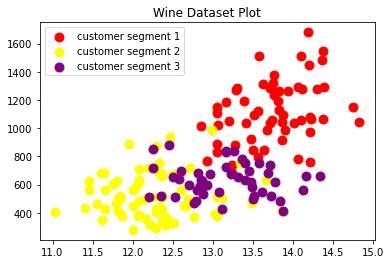

In [64]:
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'red', label = 'customer segment 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'yellow', label = 'customer segment 2')
plt.scatter(wine_X[wine_Y == 3, 0], wine_X[wine_Y == 3, 12], s = 80, c = 'purple', label = 'customer segment 3')

plt.title("Wine Dataset Plot")
plt.legend()

## Using the elbow method to find the optimal number of clusters

In [50]:
from sklearn.cluster import KMeans

In [51]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

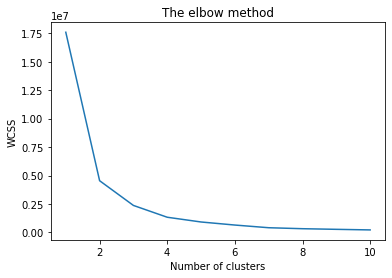

In [52]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Training the K-Means model on the dataset

In [58]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([4, 4, 4, 0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 2, 2,
       4, 4, 2, 2, 4, 0, 2, 4, 0, 0, 4, 0, 4, 2, 2, 4, 4, 2, 2, 4, 4, 3,
       2, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 2, 3, 2, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 3, 2, 2, 2,
       2, 3])

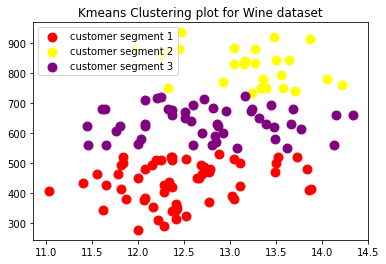

In [63]:
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'red', label = 'customer segment 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'yellow', label = 'customer segment 2')
plt.scatter(wine_X[pred_kmeans == 3, 0], wine_X[pred_kmeans == 3, 12], s = 80, c = 'purple', label = 'customer segment 3')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend();